In [28]:
#Online Payments Fraud Detection with Machine learning using two models  Random Forest Classifier and Logistic Regression


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [29]:
df=pd.read_csv("Downloads/PS_20174392719_1491204439457_log.csv/fraud_dataset.csv").sample(n=10000,random_state=42)

In [11]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 3737323 to 1615363
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 937.5+ KB
None


In [12]:
print(df.head())

         step      type      amount     nameOrig  oldbalanceOrg  \
3737323   278   CASH_IN   330218.42   C632336343       20866.00   
264914     15   PAYMENT    11647.08  C1264712553       30370.00   
85647      10   CASH_IN   152264.21  C1746846248      106589.00   
5899326   403  TRANSFER  1551760.63   C333676753           0.00   
2544263   206   CASH_IN    78172.30   C813403091     2921331.58   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3737323       351084.42   C834976624       452419.57       122201.15        0   
264914         18722.92   M215391829            0.00            0.00        0   
85647         258853.21  C1607284477       201303.01        49038.80        0   
5899326            0.00  C1564353608      3198359.45      4750120.08        0   
2544263      2999503.88  C1091768874       415821.90       337649.60        0   

         isFlaggedFraud  
3737323               0  
264914                0  
85647                 0  
589932

In [30]:
from imblearn.over_sampling import SMOTE
df['type'] = LabelEncoder().fit_transform(df['type'])


df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Define feature set and target
X = df.drop('isFraud', axis=1)
y = df['isFraud']

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, stratify=y_balanced, random_state=42
)

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Then train logistic regression on scaled data
lr_model = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)


In [32]:
rf_model = RandomForestClassifier(
    n_estimators=100,           # number of trees
    max_depth=None,             # full depth
    random_state=42,
    class_weight='balanced_subsample'     # handles class imbalance
)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', random_state=42)

In [33]:
# Predict on test data
y_pred_rf = rf_model.predict(X_test)


print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy Score: 0.9989982469321312

Confusion Matrix:
 [[1993    4]
 [   0 1996]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1997
           1       1.00      1.00      1.00      1996

    accuracy                           1.00      3993
   macro avg       1.00      1.00      1.00      3993
weighted avg       1.00      1.00      1.00      3993



In [34]:

# Train Logistic Regression on the same train/test split
lr_model = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
lr_model.fit(X_train, y_train)


y_pred_lr = lr_model.predict(X_test)


print("Logistic Regression Results")
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Results
Accuracy Score: 0.968695216629101

Confusion Matrix:
 [[1941   56]
 [  69 1927]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1997
           1       0.97      0.97      0.97      1996

    accuracy                           0.97      3993
   macro avg       0.97      0.97      0.97      3993
weighted avg       0.97      0.97      0.97      3993



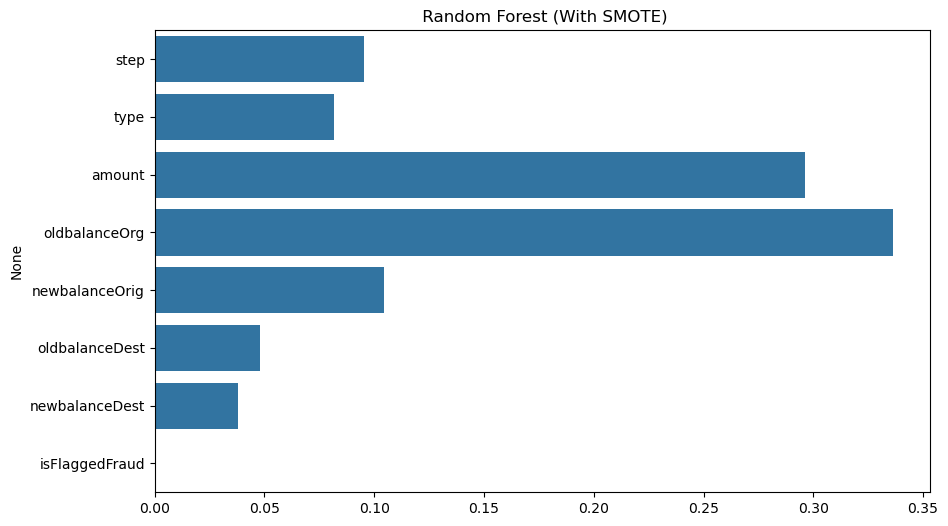

In [35]:
importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title(" Random Forest (With SMOTE)")
plt.show()

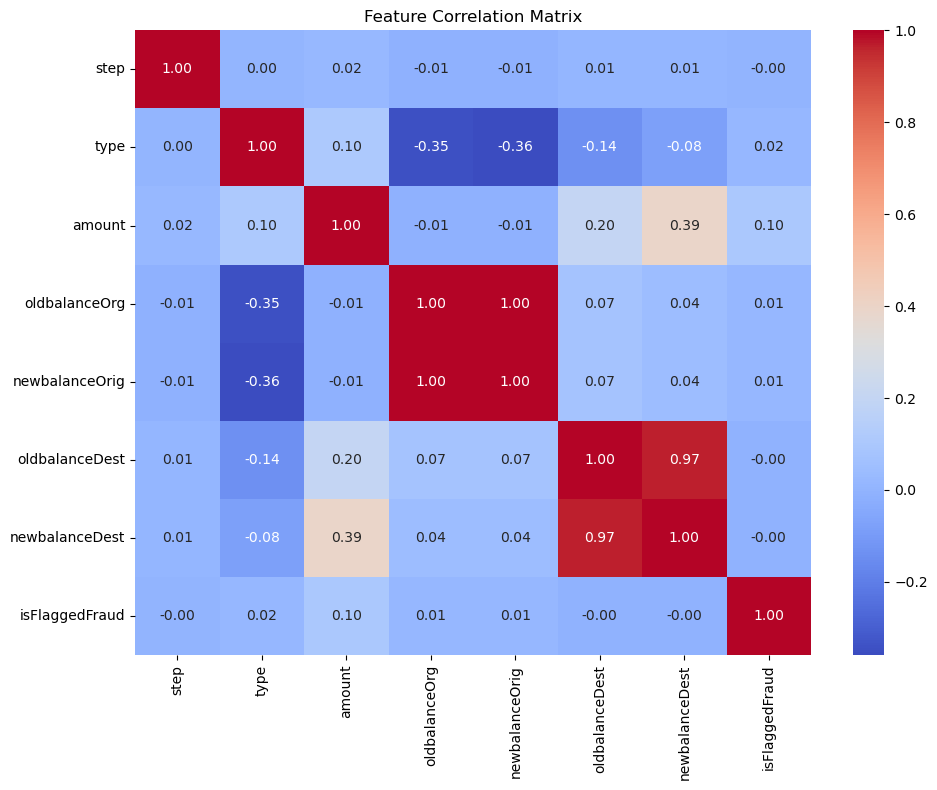

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


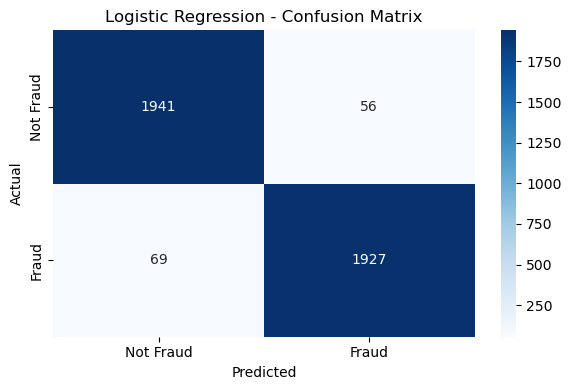

In [37]:
# Confusion Matrix Plot
y_pred_lr = lr_model.predict(X_test)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


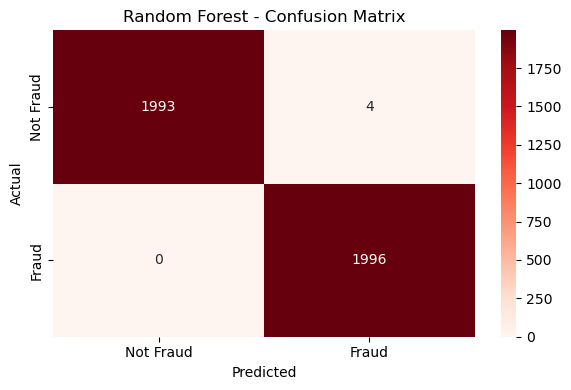

In [38]:
# Plot confusion matrixconf_matrix = confusion_matrix(y_test, y_pred_rf)
y_pred_rf = rf_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title('Random Forest - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


In [39]:



print("ROC AUC Score (Logistic Regression):", roc_auc_score(y_test, y_pred_lr))
print("ROC AUC Score (Random Forest):", roc_auc_score(y_test, y_pred_rf))




ROC AUC Score (Logistic Regression): 0.9686943993144024
ROC AUC Score (Random Forest): 0.9989984977466199
